<a href="https://colab.research.google.com/github/aqafridi/DeepLearning/blob/main/Tensorflow/MNIST_Classification_using_Custom_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST Classification using Custom ANN
MNIST contains 70,000 images of handwritten digits: 60,000 for training and 10,000 for testing. The images are grayscale, 28x28 pixels, and centered to reduce preprocessing and get started quicker. 

Keras is a high-level neural network API focused on user friendliness, fast prototyping, modularity and extensibility. It works with deep learning frameworks like Tensorflow, Theano and CNTK, so we can get right into building and training a neural network

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random
np.random.seed(0)

#Loading Data
**load data to training set and testing set**
This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. See more info at the CIFAR homepage.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


#Data size
Printing the size of train set and test set.

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


#Check for ERROR

In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

In [ ]:
num_of_samples = []

In [ ]:
cols = 5
num_classes = 10

#showing first images


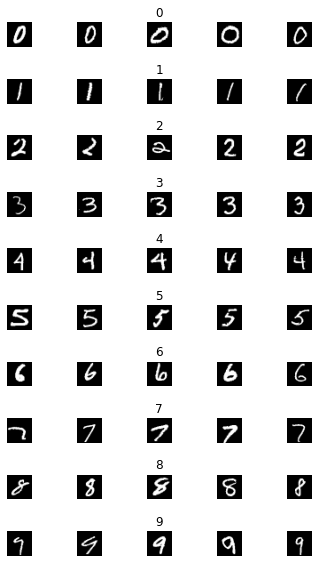

In [ ]:
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

#Distribution of data


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

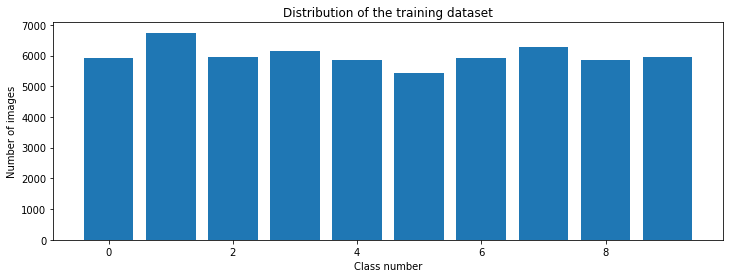

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

#Pre-Processing the Data
The first step of any Machine Learning, Deep Learning or Data Science project is to pre-process the data. We will be defining the names of the classes, over which the dataset is distributed. There are 10 different classes of color images of size 32x32. Once we have set the class name. We need to normalize the image so that our model can train faster. The pixel range of a color image is 0–255. We will be dividing each pixel of the image by 255 so the pixel range will be between 0–1. Actually, we will be dividing it by 255.0 as it is a float operation.

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
X_train = X_train/255 
X_test = X_test/255

In [ ]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

#Building model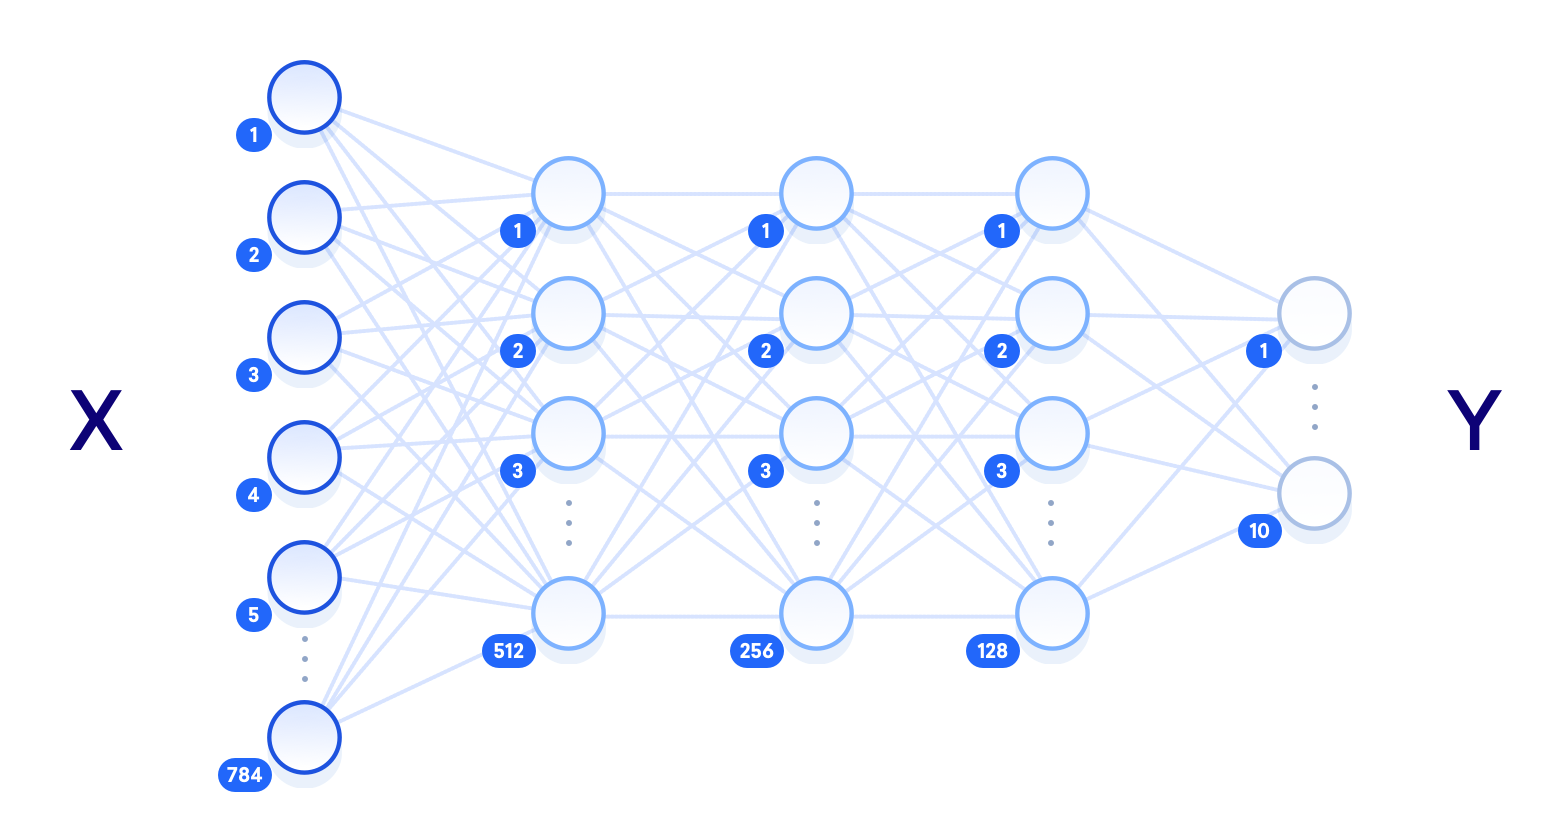

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    # model.add(Dense(10, activation='sigmoid'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 [==============================] - 4s 3ms/step - loss: 0.9431 - accuracy: 0.6851 - val_loss: 0.2893 - val_accuracy: 0.9133
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3055 - accuracy: 0.9100 - val_loss: 0.2440 - val_accuracy: 0.9308
Epoch 3/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2722 - accuracy: 0.9192 - val_loss: 0.2172 - val_accuracy: 0.9352
Epoch 4/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2478 - accuracy: 0.9265 - val_loss: 0.2146 - val_accuracy: 0.9395
Epoch 5/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2411 - accuracy: 0.9293 - val_loss: 0.2169 - val_accuracy: 0.9387
Epoch 6/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2242 - accuracy: 0.9326 - val_loss: 0.2188 - val_accuracy: 0.9362
Epoch 7/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2220 - accuracy: 0.9331 - val_loss: 0.2172 - val_accuracy: 0.9340
Epoch 

#Plot the loss

Text(0.5, 0, 'Epoch')

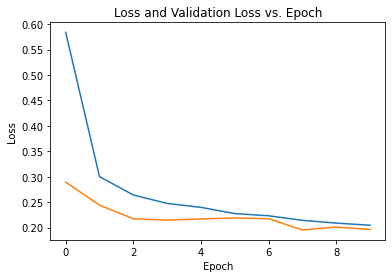

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='loval_lossss')
plt.title("Loss and Validation Loss vs. Epoch")
plt.ylabel('Loss')
plt.xlabel('Epoch')

#Plot the accuracy

Text(0.5, 0, 'epoch')

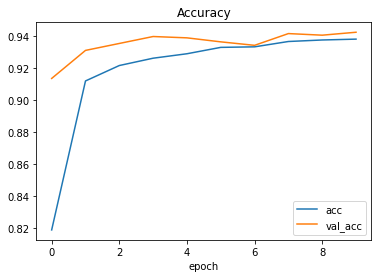

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

#Evaluate Model

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.24366267025470734
Test accuracy: 0.9314000010490417


#Predications 

In [ ]:
img=X_test[0]
img = img.reshape(1, 784)
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [7]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]')

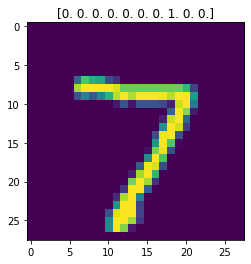

In [ ]:
plt.imshow(img.reshape((28,28)))
plt.title(y_test[0])